## Elaborato - Algoritmi di ottimizzazione combinatoria e su Rete 
- Boccarossa Antonio M63001655
- Brunello Francesco
- Pisani Luca


## Flying Sidekick Traveling Salesman Problem

### Presentazione del Problema

Il problema del commesso viaggiatore con droni (FS-TSP) è una variante del classico problema del commesso viaggiatore (TSP) che integra l'uso di droni per migliorare l'efficienza delle consegne. Invece di visitare tutti i clienti solo con un camion, come nel TSP tradizionale, l'FS-TSP prevede l'utilizzo di un drone come "spalla" per efficientare la consegna dei prodotti. 

**In sostanza, il problema si articola in questo modo:**
1. Un camion e un drone partono da un deposito centrale ('s') per consegnare merci a un insieme di clienti.
2. Il camion può effettuare consegne autonomamente o lanciare il drone da una posizione per servire un cliente.
3. Il drone ha un'autonomia limitata e deve tornare al camion per ricaricarsi o per essere recuperato.
4. L'obiettivo è determinare il percorso ottimale per il camion e il drone in modo da minimizzare il tempo totale di consegna per servire tutti i clienti e tornare al deposito. Inoltre, nel nostro caso, il deposito di ritorno darà indicato come 't', come nodo terminazione.

**I veicoli hanno le seguenti proprietà:**

*Camion*: Veicolo principale con autonomia illimitata. 
*Drone*: Veicolo di supporto con autonomia limitata e capacità di carico che si limita a un singolo pacco. 
*Tempo di percorrenza*: Tempo impiegato dal camion o dal drone per spostarsi tra due punti.
*Tempo di lancio (SL) e di recupero (SR):* Tempo impiegato per lanciare e recuperare il drone dal camion.


#### Complessità del problema
L'FS-TSP è un problema **NP-hard**, il che significa che non esiste un algoritmo noto in grado di trovare la soluzione ottimale in tempo polinomiale. La sua complessità aumenta con il numero di clienti e le limitazioni del drone (autonomia, tempo di lancio/recupero).

I **metodi di risoluzione** possono essere:
- Algortimi esatti, che garantiscono soluzione ottima ma per istanze piccole o medie.
- Algoritmi euristici e meta-euristici. 


Vedremo di seguito la sua formulazione *esatta* del problema e presenteremo alcune istanze *benchmark* per la formulazione mostrata. 

### Modellazione del problema

**Assunzioni**
1. Ogni cliente deve essere servito o dal drone o dal camion esattamente una volta.
2. Il drone e il camion partono e tornano a un deposito esattamente una volta.
3. Il camion ha una capacità non limitata e si comporta come base mobile per il dorne.
4. Il drone ha una durata limitata in termini di tempo di volo e può servire un cliente per volo.
5. Ogni percorso del drone inizia dal magazzino o da un nodo cliente.
6. Prima del lancio, il drone ha un tempo di *setup* (SL).
7. Il secondo nodo di un percorso deve essere un cliente servito dal drone
8. Il terzo nodo di un percorso deve essere o il deposito un un nodo cliente dove il drone torna al camion, senza che esso ri-visiti un nodo per recuperarlo.
9. Il drone, ha un tempo di recupero quando torna al camion (SR).


**Funzione obiettivo:** Minimizzare il tempo richiesto per servire ogni cliente e tornare al deposito.

**Formulazione**
- Il deposito è diviso nel nodo 's' come sorgente e 't' come destinazione.
- $G(V,A)$ è il grafo direzionato completo, dove $V=C \  \cup \  {s,t} $ e A l'insieme di archi.
- $\forall(i,j) \ \in \ A, t_{ij} $ è il tempo di navigazione del camion e $d_{ij}$ è il tempo di navigazione del drone.
- *SL* e *SR* sono rispettivamente i tempi di lancio e i tempi di recupero del drone.
- *Dtl* è il tempo limite del drone.

**Variabili di decisione**

*Binarie*
- $(i,j) \in A \quad y_{ij} = 1 $  se l'arco (i,j) è attraversato dal camion.
- $(i,j) \in A \quad h \in C \quad y_{ij}^h = 1 $ se l'arco (i,j) è attraversato dal camion mentre il drone serve il nodo h.
- $h \in C \quad \theta^h = 1 $ se il cliente h è servito dal drone.
- $i \in V \quad h \in C \quad  \omega_i^h=1$  se i è il nodo orgine del percorso che serve il nodo h.
- $i \in V \quad h \in C \quad  \delta_i^h=1$ e i è il nodo destinazione del percorso che serve il nodo h.

*Continue*
- $h \in C \quad \sigma^h = 1 $ è il tempo che il camion aspetta il drone al nodo destinazione del suo percorso servendo il cliente h.


**Funzione obiettivo**

$$min \quad \sum_{(i,j) \in A} t_{ij}y_{ij} + \sum_{h \in C} (SL + SR) \ \theta^h - \sum_{h \in C} SL\ \omega_s^h + \sum_{h\in C} \sigma^h$$



- Il primo termine rappresenta la lunghezza del percorso del camion.
- Il secondo e il terzo termine rappresentano il tempo di lancio e di recovery del drone.
- L'ultimo termine rappresenta il tempo di attesa del camion


**Vincoli**

*Vincoli di instradamento del camion.*
- $\sum\limits_{j: (s,j) \in A} y_{sj} = \sum\limits_{i: (i,t) \in A} y_{it} = 1 \quad$\
  *Un arco in uscita dalla sorgente e uno in ingresso per la destinazione.*
- $\sum\limits_{j: (i,j) \in A} y_{ij} = \sum\limits_{j: (j,i) \in A} y_{ji} \leq 1 \quad i \in V \quad$\
  *Un arco in uscita e un arco in ingresso se il nodo è vistato dal camion.*
- $\sum\limits_{(i,j) \in S | (i,j) \in A} y_{ij} \leq \sum\limits_{h \in S \backslash \{q\}} (1- \theta^h) \quad S \subseteq V, q \in S \quad$\
  *Vincolo eliminazione sottogiri.*

*Vincoli del percorso del camion.*
-  $\sum\limits_{j: (i,j) \in A} y_{ij}^h = \sum\limits_{j: (j,i) \in A} y_{ji}^h = \omega_i^h - \delta_i^h \quad i \in V \quad h \in C \quad$\
  *Per ogni percorso senza drone, è un path dal nodo di lancio al nodo di arrivo.* 

*Vincoli di singola assegnazione.*
- $y_{ij} + \omega_{i}^j + \delta_{i}^j \leq 1 \quad (i,j) \in A \quad$\
  *Se (i,j) è percorsa dal camion allora il drone non può andare da i a j o da j a i.*
- $\sum\limits_{j: (h,j) \in A} y_{hj} + \theta^h = 1 \quad h \in C \quad$\
  *Ogni cliente deve essere servito o dal drone o dal camion.*

*Vincoli di consistenza*
- $\sum\limits_{h \in C} y_{ij}^h \leq y_{ij} \quad (i,j) \in A \quad$\
  *Il percorso del camion mentre il drone serve un cliente, deve essere un subpath.*
- $\sum\limits_{i \in V \backslash \{t,h\}} \omega_{i}^h = \sum\limits_{j \in V \backslash \{s,h\}} \delta_{j}^h = \theta^h \quad h \in C \quad$\
  *Se h è servito dal drone, allora il percorso deve avere una sorgente e una destinazione.*
- $\sum\limits_{h \in C \backslash \{i\}} \omega_{i}^h + \theta^i \leq 1 \quad i \in C \quad$\
  *Se i è il punto di lancio, allora non può essere servito dal drone.*
- $\sum\limits_{h \in C \backslash \{j\}} \delta_{j}^h + \theta^j \leq 1 \quad j \in C \quad$\
  *Se j è il punto di destinazione, allora non può essere servito dal drone.*

*Vincoli di endurance del drone*
- $\sum_\limits{(i,j) \in A} t_{ij} \  y_{ij}^h \leq (Dtl - SR) \theta^h \quad h \in C \quad$\
  *La durata del percorso del camion non può eccedere l'endurance del drone.*
- $\sum_\limits{i \in V \backslash \{t\}} d_{ih} \  \omega{i}^h  + \sum_\limits{j \in V \backslash \{s\}} d_{hj} \ \delta{j}^h  \leq (Dtl - SR)\  \theta^h \quad h \in C \quad$\
  *La durata del percorso del drone non può eccedere la sua endurance.*

*Vincoli di attesa.*
- $\sum\limits_{i \in V \backslash \{t\}} d_{ih} \  \omega_{i}^h  + \sum\limits_{j \in V \backslash \{s\}} d_{hj} \  \delta_{j}^h -  \sum_{(i,j) \in A} t_{ij} y_{ij}^h \leq \sigma^h \quad h \in C \quad$\

*Il tempo di attesa del camion è dato dalla differenza dalla durata del percorso del drone e della durata del percorso del camion, se quest'ultima è maggiore di 0.* 

### Implementazione

#### Funzione per la generazione di istanze di test

#### Istanze

In [118]:
"""
GENERAZIONE DELLE ISTANZE DI TEST 

Il seguente codice è pensato per la generazione delle istanze di test da sottoporre al modello. 

L'istanza generata ha questa forma:

customers = ['c1', 'c2', 'c3']  # Insieme dei clienti C
nodes = ['s', 'c1', 'c2', 'c3', 't']  # Insieme di tutti i nodi V (inclusi anche sorgente e destinazione)
arcs = {('s', 'c1'), ('s', 'c2'), ('c1', 'c3'),  ('c3', 'c1'), ('c2', 't'), ('c3', 't')}  # Insieme degli archi A
truck_travel_time = {  # Esempio per le variabili tij
    ('s', 'c1'): 2, ('s', 'c2'): 12, ('c1', 'c3'): 8, ('c3', 'c1'):8,
    ('c2', 't'): 15, ('c3', 't'): 11
} 
drone_travel_time = {  # Esempio per le variabili dij 
    ('s', 'c1'): 5, ('s', 'c2'): 6, ('c1', 'c3'): 4, ('c3', 'c1'):4,
    ('c2', 't'): 7, ('c3', 't'): 6
}

"""

import random


clienti = 8 #scegliere il numero di CLIENTI desiderato. 

customers = ['c' + str(i + 1) for i in range(clienti)] #genera il vettore di clienti tipo 'c0', 'c1' e così via. 
nodes = ['s'] + customers + ['t']  # Aggiunge s e t ai customers.

# Tutti gli archi possibili in un grafo completo, senza archi tra 's' e 't' e 't' e 's' o auto archi.
arcs = {
    (n1, n2) 
    for n1 in nodes 
    for n2 in nodes 
    if n1 != n2 and (n1 != 's' or n2 != 't') and (n1 != 't' or n2 != 's')
}


truck_travel_time = {  #genera i tempi di percorrenza del camion
    (n1, n2): random.randint(5, 50)  # Genera un tempo casuale tra 5 e 50
    for n1 in nodes for n2 in nodes if (n1, n2) in arcs
}

drone_travel_time = { #genera i tempi di percorrenza del drone
    (n1, n2): random.randint(3, 25)  # Genera un tempo casuale tra 3 e 25
    for n1 in nodes for n2 in nodes if (n1, n2) in arcs
}
         
    

In [107]:
# Di seguito abbiamo il tempo di lancio, recovery e persistenza del drone. 


drone_launch_time = 2  # Esempio SL
drone_recovery_time = 2  # Esempio SR
drone_time_limit = 40  # Esempio Dtl


#### Variabili di decisione

In [121]:
import gurobipy as gp


# Creiamo il modello 
model = gp.Model("Drone-Assisted Vehicle Routing")



#Variabili binarie 


"""
Variabile binaria che indica il percorso del camion. 
(i,j) ∈ A:  Truck path (1 if the truck travels on arc (i,j), 0 otherwise)
"""
y = {}
for (i,j) in arcs:
    y[i, j] = model.addVar(vtype=gp.GRB.BINARY, name=f"y_{i}_{j}")


"""
Variabile binaria che indica se il drone sta servendo h mentre il camion percorre l'arco i,j
(i,j) ∈ A, h ∈ C: Drone use (1 if drone serves customer h while truck traverses (i,j))
"""
y_prime = {}
for i, j in arcs:
    for h in customers:
        y_prime[i, j, h] = model.addVar(vtype=gp.GRB.BINARY, name=f"y_prime_{i}_{j}_{h}")


"""
Variabile binaria che indica se il drone ha servito il nodo h.
h ∈ C: Drone service (1 if customer h is served by the drone, 0 otherwise)
"""
theta = {}
for h in customers:
    theta[h] = model.addVar(vtype=gp.GRB.BINARY, name=f"theta_{h}")



"""
Variabile binaria che indica il punto di partenza del drone.
i ∈ V, h ∈ C: Origin of drone sortie (1 if node i is the origin for serving customer h)
"""
omega = {}
for i in nodes:
    for h in customers:
        omega[i, h] = model.addVar(vtype=gp.GRB.BINARY, name=f"omega_{i}_{h}")


"""
Variabile binaria che indica il punto di arrivo del drone. 
i ∈ V, h ∈ C: Destination of drone sortie (1 if node i is the destination for serving h)
"""
delta = {}
for i in nodes:
    for h in customers:
        delta[i, h] = model.addVar(vtype=gp.GRB.BINARY, name=f"delta_{i}_{h}")



# Variabili continue 

"""
Variabile che indica il tempo di attesa del camion al ricongiungimento col drone. 
h ∈ C: Waiting time of the truck at the destination of the sortie serving customer h
"""
sigma = {}
for h in customers:
    sigma[h] = model.addVar(vtype=gp.GRB.CONTINUOUS, name=f"sigma_{h}")


#### Funzione obiettivo.

In [109]:
objective = (
    gp.quicksum(truck_travel_time[i, j] * y[i, j] for (i,j) in arcs) +  # Lunghezza della path del camion. 
    gp.quicksum((drone_launch_time + drone_recovery_time) * theta[h] for h in customers) -  # Lancio e recovery del drone 
    gp.quicksum(drone_launch_time * omega['s', h] for h in customers) + #Togliamo il tempo di lancio alla sorgente
    gp.quicksum(sigma[h] for h in customers)  #Tempo di attesa del camion nei vari punti.

model.setObjective(objective, gp.GRB.MINIMIZE) #Vogliamo minimizzare il tempo di percorrenza. 

#### Vincoli di instradamento del camion. 

In [122]:
"""
Vincoli che indicano che l'origine ha solo elementi in uscita e la destinazione solo elementi in ingresso.
One outgoing arc from the origin, one incoming arc to the destination
"""
model.addConstr(gp.quicksum(y['s', j] for j in nodes if ('s', j) in arcs) == 1)
model.addConstr(gp.quicksum(y[i, 't'] for i in nodes if (i, 't') in arcs) == gp.quicksum(y['s', j] for j in nodes if ('s', j) in arcs))


"""
Vincoli che indicano che per ogni nodo interno, se c'è uno di ingresso devo avere uno di uscita. 
Flow conservation for other nodes visited by the truck
"""
for i in customers:
        model.addConstr(gp.quicksum(y[j, i] for j in nodes if (j, i) in arcs) == gp.quicksum(y[i, j] for j in nodes if (i, j) in arcs) )
        model.addConstr(gp.quicksum(y[i, j] for j in nodes if (i, j) in arcs)<= 1)



"""
Vincoli di annullamento dei sottogiri.
# Subtour elimination constraints (preventing cycles)
"""
for i in nodes:
    for j in nodes:
        if i != j and (i, j) in arcs:
            model.addConstr(
                gp.quicksum(y[i, k] for k in nodes if (i, k) in arcs) <= 
                gp.quicksum((1 - theta[h]) for h in customers if (i, j) in arcs)
            )

#### Vincoli sul percorso del camion senza drone.

In [111]:
"""
Per ogni consegna del drone, c'è un percorso del camion corrispondente senza di esso. 
For each sortie, there is a path from the launch node to the recovery node travelled by the truck without the drone on board​
"""
for i in nodes:
    for h in customers:
        model.addConstr(
            gp.quicksum(y_prime[i, j, h] for j in nodes if (i, j) in arcs) -
            gp.quicksum(y_prime[j, i, h] for j in nodes if (j, i) in arcs) == 
            omega[i, h] - delta[i, h] 
        )

#### Vincoli di assegnamento singolo. 

In [112]:
"""
Questi vincoli indicano che il drone non può attraversare gli stessi archi attraversati dal camion.
Drone can't fly from i if (i, j) is crossed by the truck
"""
for (i,j) in arcs:
    if j in customers:
        model.addConstr(y[i, j] + omega[i, j] + delta[i, j] <= 1)


"""
Ogni cliente è servito dal drone o dal camion. 
Each client must be served either by the truck or the drone
"""
for h in customers:
    model.addConstr(
        gp.quicksum(y[h,j] for j in nodes if (h, j) in arcs) + theta[h] == 1
    )


#### Vincoli di consistenza.

In [113]:
"""
Il path del camion mentre il drone serve un cliente deve essere un sotto-path o un path origine destinazione.
The truck path during a drone sortie must be a subpath or the origin-destination path
"""
for (i,j) in arcs:
    model.addConstr(gp.quicksum(y_prime[i, j, h] for h in customers) <= y[i, j])

"""
Se un certo nodo è servito dal drone, allora abbiamo un corrispondente nodo di lancio e un corrispondente drone di recovery.
If h is served by the drone, the corresponding sortie must have a launch and a recovery node
"""
for h in customers:
    model.addConstr(gp.quicksum(omega[i, h] for i in nodes if i!='t' and i!=h) == 
                    gp.quicksum(delta[j, h] for j in nodes if j!= 's' and j!=h))
    
    model.addConstr(gp.quicksum(omega[i, h] for i in nodes if i!='t' and i!=h) == theta[h])


"""
Se il nodo è un nodo di lancio, non può essere servito dal drone. 
If i is the launch node of a sortie, it can't be served by the drone
"""
for i in customers: 
    model.addConstr(gp.quicksum(omega[i, h] for h in customers if h!=i) + theta[i] <= 1)


"""
Se il nodo è un nodo di recovery, non può essere servito dal drone. 
If j is the recovery node of a sortie, it can't be served by the drone
"""
for j in customers:
    model.addConstr(gp.quicksum(delta[j, h] for h in customers if h!=j) + theta[j] <= 1)


#### Vincoli di endurance del drone. 

In [114]:
"""
La durata del percorso fatto dal camion non può eccedere la endurance del drone. (Dtl- drone recovery time)
# The duration of the truck path of a sortie can't exceed the drone endurance
"""
for h in customers:
    model.addConstr(gp.quicksum(truck_travel_time[i, j] * y_prime[i, j, h] for (i,j) in arcs) <= 
                    (drone_time_limit - drone_recovery_time) * theta[h])


"""
Il path del drone non può eccedere la sua endurance. (Dtl-recovery time)
The duration of a drone sortie can't exceed the drone endurance
"""
for h in customers:
    model.addConstr(
        gp.quicksum(drone_travel_time[i, h] * omega[i, h] for i in nodes if (i, h) in drone_travel_time and i!='t') +
        
        gp.quicksum(drone_travel_time[h, j] * delta[j, h] for j in nodes if (h, j) in drone_travel_time and j!='s') <= 
        
        (drone_time_limit - drone_recovery_time) * theta[h]
    )


#### Vincoli di attesa.

In [115]:
"""
Il tempo di attesa dle camion è dato dalla differenza del tempo di cammino del camion meno quello del drone, se è maggiore di 0.
The truck waiting time of a sortie is given by the difference between the duration of the drone path 
and the duration of the truck path, if it is greater than 0
"""
for h in customers:
    model.addConstr(
        gp.quicksum(drone_travel_time[i, h] * omega[i, h] for i in nodes if (i, h) in drone_travel_time and i!='t') +
        gp.quicksum(drone_travel_time[h, j] * delta[j, h] for j in nodes if (h, j) in drone_travel_time and j!='s') -
        gp.quicksum(truck_travel_time[i, j] * y_prime[i, j, h] for (i, j) in arcs) <=
        sigma[h]
    )


### Ottimizzazione e stampa della soluzione.

In [116]:
"""
Ottimizzazione e stampa delle soluzioni.
"""

model.optimize()

truckSOL = []
droneSOL= []

print("Path Camion: ")
for (i,j) in arcs:
    if y[i,j].X > 0.5:
        truckSOL.append((i,j))

print(truckSOL)
        

for (i,j) in arcs:
    for h in customers:                
        
        if omega[i,h].X > 0.5:
            if theta[h].X > 0.5:
                if (i,h) in arcs:
                    droneSOL.append((i,h))
    
        if delta[j,h].X > 0.5:
                droneSOL.append((h,j))

"""
Stampa del path del drone
"""
print("\nUtilizzo del drone:")
for (i, j) in arcs:
    for h in customers:
        if y_prime[i, j, h].X > 0.5:
            print(f"  Drone serve il cliente {h} mentre il camion percorre l'arco ({i}, {j})")

print("\nServizio drone:")
for h in customers:
    if theta[h].X > 0.5:
        print(f"  Cliente {h} servito dal drone")

print("\nOrigine della missione del drone:")
for i in nodes:
    for h in customers:
        if omega[i, h].X > 0.5:
            print(f"  Nodo {i} è l'origine per servire il cliente {h}")

print("\nDestinazione della missione del drone:")
for i in nodes:
    for h in customers:
        if delta[i, h].X > 0.5:
            print(f"  Nodo {i} è la destinazione per servire il cliente {h}")

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 7735U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 410 rows, 968 columns and 6392 nonzeros
Model fingerprint: 0x03cf2fe1
Variable types: 8 continuous, 960 integer (960 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+00]
Found heuristic solution: objective 448.0000000
Presolve removed 133 rows and 362 columns
Presolve time: 0.05s
Presolved: 277 rows, 606 columns, 3070 nonzeros
Variable types: 0 continuous, 606 integer (598 binary)
Found heuristic solution: objective 437.0000000

Root relaxation: objective 6.137756e+01, 985 iterations, 0.03 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  De

### Disegno del grafo 

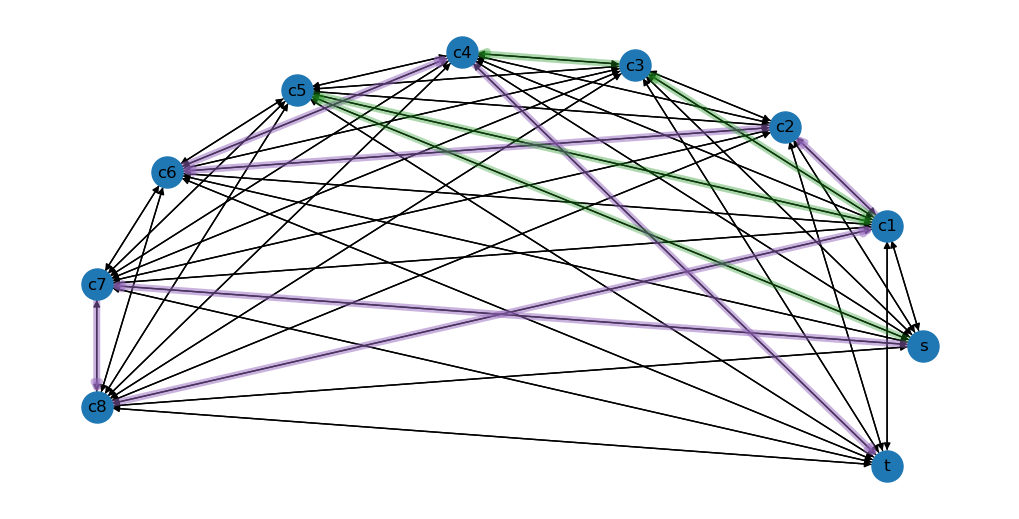

In [117]:
import networkx as nx #uso networkx e pyplot di matplotlib
import matplotlib.pyplot as plt


#Genero etichette di label 

labels = {}

for (i,j) in arcs:
    labels[(i,j)] = (truck_travel_time[i,j], drone_travel_time[(i,j)])


posofnodes = nx.circular_layout(G)
#Come disegno un grafo?
G = nx.DiGraph() #grafo orientato, se volessi non orientato è Graph



# aggiunge i nodi
G.add_nodes_from(nodes) #add_nodes_from mi permette di aggiunegre una lista di nodi, tramite nodes

# aggiunge gli archi
G.add_edges_from(arcs) #stesso per add_edges_from con gli archi e i valori

# disegna il grafo
plt.figure(figsize=(10,5)) #serve per plottare il rettangolo 

nx.draw(G, posofnodes, with_labels=True, node_size=500) #per plottare il grafo, nx.draw con Grafo, posizione dei nodi, se con label (del nodo) o meno 
# e la grandezza dei nodi

#nx.draw_networkx_edge_labels(G, posofnodes, edge_labels=labels, label_pos=0.25) #se voglio anche i costi allora uso questa funzione, 
# i costi dati dagli archi e la posizione delle label. 

plt.draw() #plot del draw. 

nx.draw_networkx_edges(G, posofnodes, edgelist=truckSOL, width=5, alpha=0.5, edge_color="tab:purple")
nx.draw_networkx_edges(G, posofnodes, edgelist=droneSOL, width=5, alpha=0.05, edge_color="tab:green")
plt.draw()
